### Họ và tên: 
### Mã Sinh Viên:
### Lớp: 
### Đề thi số:
### Học phần: Trực quan hóa dữ liệu

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.plotting import ColumnDataSource
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.models.widgets import Tabs, Panel,Button,Dropdown,CheckboxGroup,\
                                RadioGroup,Slider,TextInput,Select,MultiSelect

from bokeh.models import DateSlider, DateRangeSlider
from datetime import date
from datetime import datetime
from bokeh.palettes import Category20 as palette
import itertools
from bokeh.models import CategoricalColorMapper,CustomJS
from numpy.random import random, normal
from bokeh.io import curdoc
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
output_notebook()
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
data=load_wine().data
columns=load_wine().feature_names
df = pd.DataFrame(data, columns=columns)

Loading BokehJS ...

In [9]:
from sklearn.datasets import load_breast_cancer,load_diabetes

In [8]:
data=load_breast_cancer().data
columns=load_breast_cancer().feature_names
df = pd.DataFrame(data, columns=columns)
y=load_breast_cancer().target
print(np.unique(y))
df.head()

[0 1]


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [11]:
data=load_diabetes().data
columns=load_diabetes().feature_names
df = pd.DataFrame(data, columns=columns)
y=load_diabetes().target
print(np.unique(y),df.shape)
df.head()

[ 25.  31.  37.  39.  40.  42.  43.  44.  45.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  57.  58.  59.  60.  61.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  77.  78.  79.  80.  81.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 107. 108. 109. 110. 111. 113. 114.
 115. 116. 118. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 131.
 132. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 150. 151. 152. 153. 154. 155. 156. 158. 160. 161. 162. 163.
 164. 166. 167. 168. 170. 171. 172. 173. 174. 175. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 189. 190. 191. 192. 195. 196. 197.
 198. 199. 200. 201. 202. 206. 208. 209. 210. 212. 214. 215. 216. 217.
 219. 220. 221. 222. 225. 229. 230. 232. 233. 235. 236. 237. 241. 242.
 243. 244. 245. 246. 248. 249. 252. 253. 257. 258. 259. 261. 262. 263.
 264. 265. 268. 270. 272. 273. 274. 275. 276. 277. 279. 280. 281. 283.
 288. 

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [2]:
def SPLOM(x):
    n,p = x.shape
    fig, axes = plt.subplots(nrows= p, ncols = p, figsize=(8,8))
    for i in range(p):
        for j in range(p):
            if i!=j:
                axes[i,j].scatter(x[x.columns[i]],x[x.columns[j]], marker ='o')
            else:
                axes[i,i].hist(x[x.columns[i]])
    plt.show()

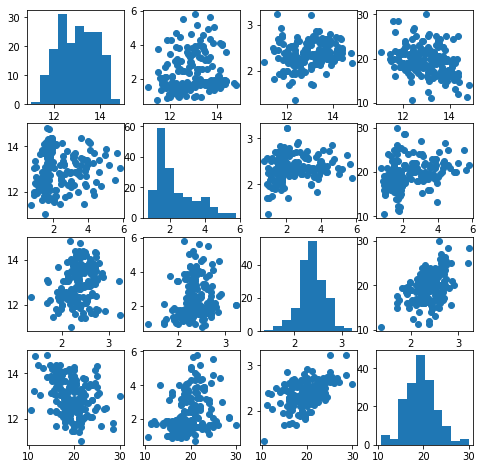

In [3]:
SPLOM(df[df.columns[0:4]])

In [10]:
import plotly.express as px
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.preprocessing import MinMaxScaler

In [11]:
iris = load_iris()
iris_data = np.hstack((iris.data, iris.target.reshape(-1,1)))

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names+ ["FlowerType"])
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   FlowerType  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [12]:
iris_data_scaled = MinMaxScaler().fit_transform(iris.data)
iris_data_scaled = np.hstack((iris_data_scaled, iris.target.reshape(-1,1)))

iris_scaled_df = pd.DataFrame(data=iris_data_scaled, columns=iris.feature_names+ ["FlowerType"])
iris_scaled_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   FlowerType  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [13]:
wine = load_wine()
wine_data = np.hstack((wine.data, wine.target.reshape(-1,1)))

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names+ ["WineCategory"])
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  WineCategory  
0                          3.92   1065.0           0.0  
1                          3.40   1050.0           0.0  
2                          3.17   1185.0           0.0  
3                          3.45   1480.0           0.0  
4                          2.93    735.0           0.0

In [14]:
wine_data_scaled = MinMaxScaler().fit_transform(wine.data)
wine_data_scaled = np.hstack((wine_data_scaled, wine.target.reshape(-1,1)))

wine_scaled_df = pd.DataFrame(data=wine_data_scaled, columns=wine.feature_names+ ["WineCategory"])
wine_scaled_df.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  \
0         0.372014  0.455285                      0.970696  0.561341   
1         0.264505  0.463415                      0.780220  0.550642   
2         0.375427  0.447154                      0.695971  0.646933   
3         0.556314  0.308943                      0.798535  0.857347   
4         0.259386  0.455285                      0.608059  0.325963   

   WineCategory  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [15]:
boston = load_boston()
boston_data = np.hstack((boston.data, boston.target.reshape(-1,1)))

boston_df = pd.DataFrame(data=boston_data, columns=boston.feature_names.tolist()+ ["HousePrice"])
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  HousePrice  
0     15.3  396.90   4.98        24.0  
1     17.8  396.90   9.14        21.6  
2     17.8  392.83   4.03        34.7  
3     18.7  394.63   2.94        33.4  
4     18.7  396.90   5.33        36.2

In [16]:
boston_data_scaled = MinMaxScaler().fit_transform(boston.data)
boston_data_scaled = np.hstack((boston_data_scaled, boston.target.reshape(-1,1)))

boston_scaled_df = pd.DataFrame(data=boston_data_scaled, columns=boston.feature_names.tolist()+ ["HousePrice"])
boston_scaled_df.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  HousePrice  
0  0.000000  0.208015  0.287234  1.000000  0.089680        24.0  
1  0.043478  0.104962  0.553191  1.000000  0.204470        21.6  
2  0.043478  0.104962  0.553191  0.989737  0.063466        34.7  
3  0.086957  0.066794  0.648936  0.994276  0.033389        33.4  
4  0.086957  0.066794  0.648936  1.000000  0.099338        36.2

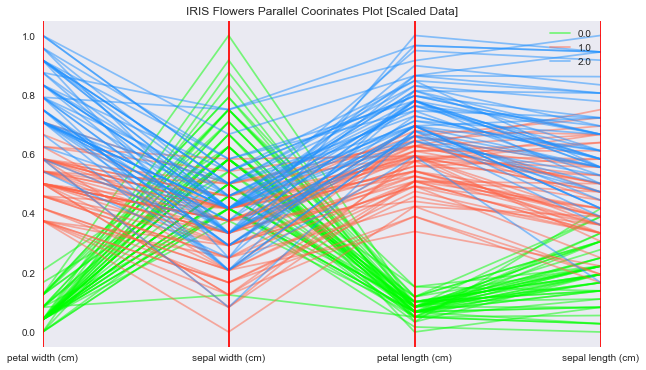

In [44]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(iris_scaled_df, "FlowerType",
                                     cols= ["petal width (cm)", "sepal width (cm)", "petal length (cm)", "sepal length (cm)"],
                                     color=["lime", "tomato","dodgerblue"],
                                     alpha=0.5,
                                     axvlines_kwds={"color":"red"})
    plt.title("IRIS Flowers Parallel Coorinates Plot [Scaled Data]")

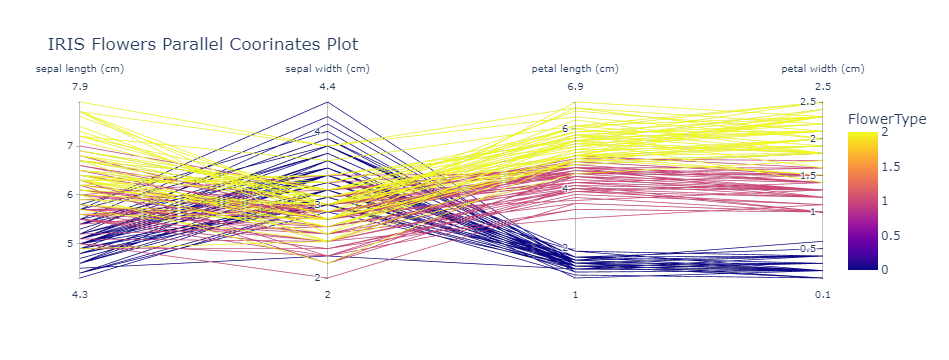

In [18]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

fig = px.parallel_coordinates(iris_df, color="FlowerType", dimensions=cols,
                              title="IRIS Flowers Parallel Coorinates Plot")
fig.show()

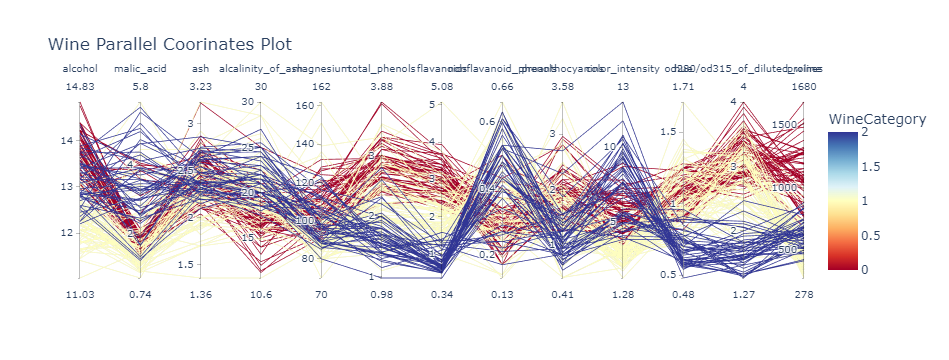

In [19]:
cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

fig = px.parallel_coordinates(wine_df, color="WineCategory", dimensions=cols,
                              color_continuous_scale=px.colors.diverging.RdYlBu, width=1000,
                              title="Wine Parallel Coorinates Plot")
fig.show()

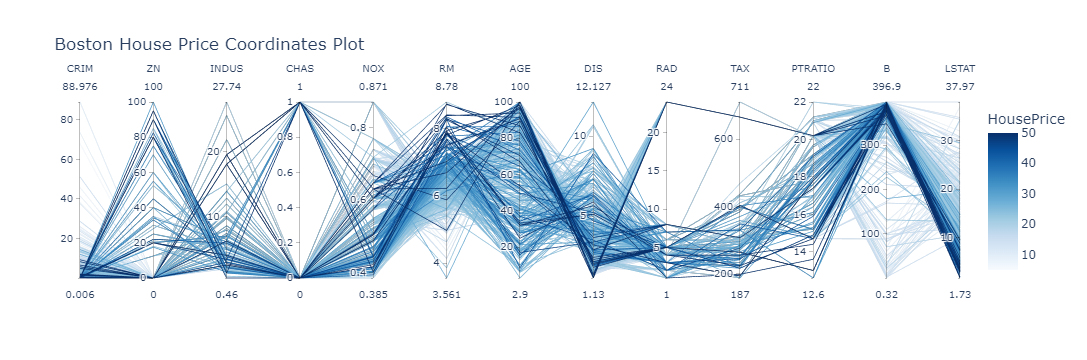

In [20]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT',]
fig = px.parallel_coordinates(boston_df, color="HousePrice", dimensions=cols,
                              color_continuous_scale=px.colors.sequential.Blues,
                              title="Boston House Price Coordinates Plot")
fig.show()

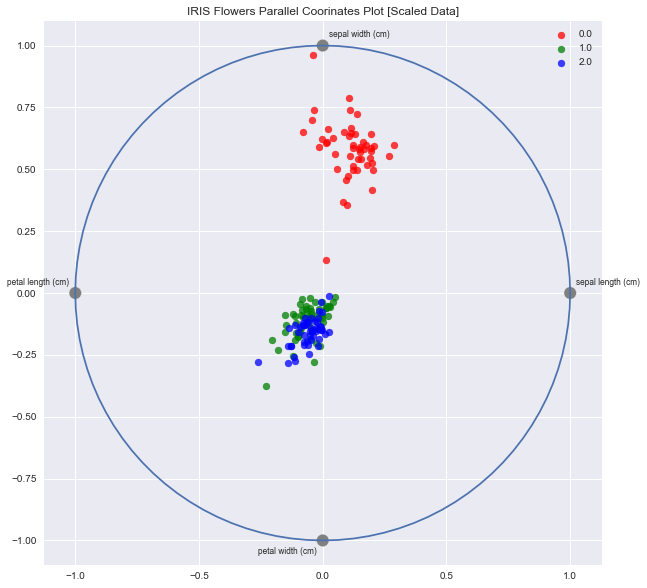

In [47]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,10))
    pd.plotting.radviz(iris_scaled_df, "FlowerType",color=["red", "green","blue"],alpha=0.75)
    t=np.linspace(0,2*np.pi,101)
    plt.plot(np.cos(t),np.sin(t),color='b')
    plt.title("IRIS Flowers Parallel Coorinates Plot [Scaled Data]")

Text(0.5, 1.0, 'IRIS Flowers Radviz Plot [Scaled Data]')

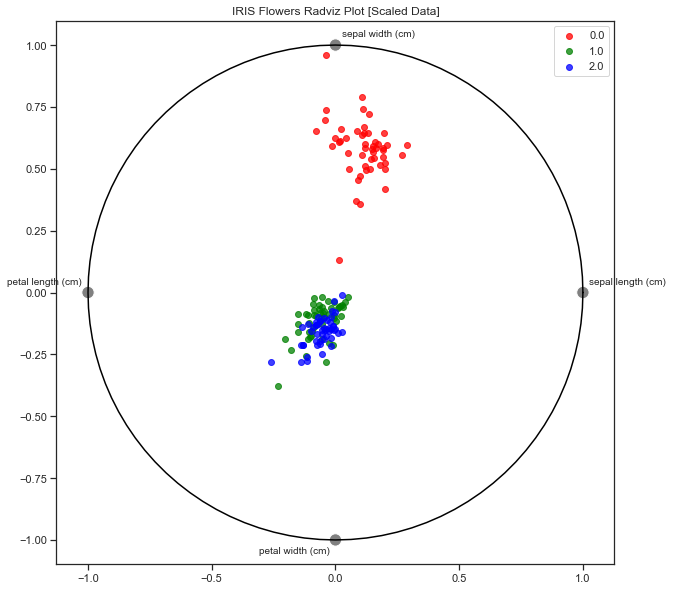

In [50]:
fig = plt.figure(figsize=(10,10))
pd.plotting.radviz(iris_scaled_df, "FlowerType",color=["red", "green","blue"],alpha=0.75)

t=np.linspace(0,2*np.pi,101)
plt.plot(np.cos(t),np.sin(t),color='black')

plt.title("IRIS Flowers Radviz Plot [Scaled Data]")

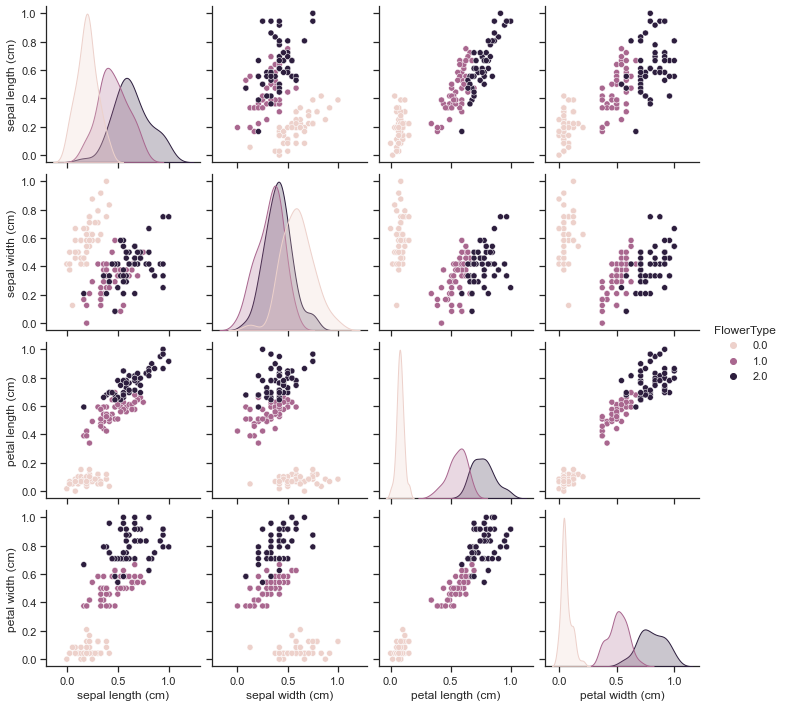

In [48]:
import seaborn as sns
#sns.set_theme(style="ticks")
sns.pairplot(iris_scaled_df, hue="FlowerType")

## Câu 1: Cho biết dữ liệu có bao nhiêu quan sát và bao nhiêu thuộc tính.

In [3]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [4]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [5]:
df.shape

(178, 13)

In [6]:
print("Số quan sát : ",df.shape[0])
print("Số thuộc tính : ",df.shape[1])

Số quan sát :  178
Số thuộc tính :  13


## Câu 2: Chọn 1 thuộc tính trong số các thuộc tính và vẽ biểu đồ tần số tương ứng.

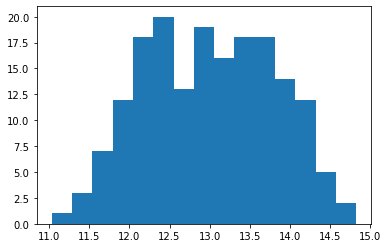

In [7]:
fig = plt.figure()
plt.hist(df[df.columns[0]], bins = 15 )
plt.show()

## Câu 3: Chọn 2 thuộc tính trong số các thuộc tính và vẽ biểu đổ scatter tương ứng.

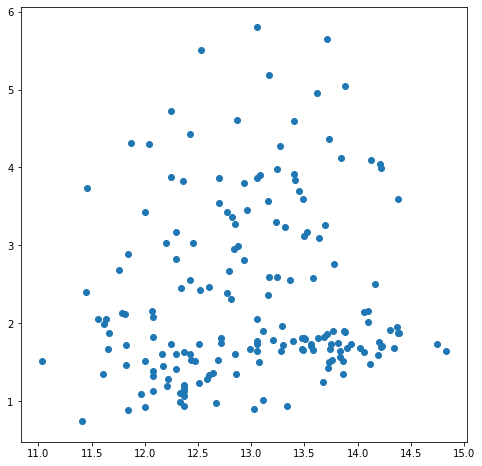

In [8]:
x= df
fig = plt.figure(figsize = (8,8))
plt.scatter(df[x.columns[0]],df[x.columns[1]], marker ='o' )
plt.show()

## Câu 4: Chọn 4 thuộc tính trong số các thuộc tính và vẽ biểu đổ scatter plot matrix tương ứng.

In [9]:
def SPLOM(x):
    n,p = x.shape
    fig, axes = plt.subplots(nrows= p, ncols = p, figsize=(8,8))
    for i in range(p):
        for j in range(p):
            if i!=j:
                axes[i,j].scatter(x[x.columns[i]],x[x.columns[j]], marker ='o')
            else:
                axes[i,i].hist(x[x.columns[i]])
    plt.show()

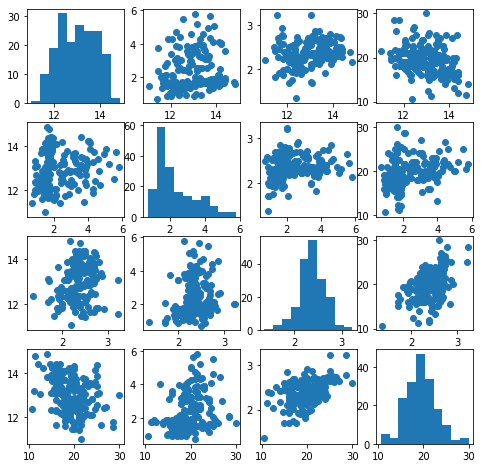

In [10]:
SPLOM(df[df.columns[0:4]])

## Câu 5: Sử dụng thư viện Bokeh, thiết kế mô hình tương tác để lựa chọn các thuộc tính và vẽ biểu đồ scatter.

In [11]:
data = ColumnDataSource(data = {
    'x' : df['alcohol'],
    'y' : df['ash']
    
})


plot = figure(plot_width=300, plot_height=200,title = 'Attribute selector application')
plot.scatter('x', 'y', source = data, color = 'Black')



select_x = Select(options = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline' ], value = 'alcohol', title = 'Select a new x axis attribute')
select_y = Select(options = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline'], value = 'ash', title = 'Select a new y axis attribute')

def callback(attr, old, new):
    name_x=select_x.value
    name_y=select_y.value
   
    
    data.data = {'x' : df[name_x], 'y': df[name_y]}
  
layout = row(column(select_x,select_y), plot)



def modify_doc(doc):
    doc.add_root(layout)
    doc.title = "Sliders"
    select_x.on_change('value', callback)
    select_y.on_change('value', callback)
    
   
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)